In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from PIL.Image import *


import matplotlib.image as mpimg

In [73]:
## Image Processing
class Picture:
    '''
    Creer une image à partir d'un fichier en utilisant la fonction imread() de matplotlig.image ou plus généralement la 
    librairie Pillow
    '''
    def __init__(self,nomFichier = None,H = None, W = None):
        if nomFichier == None:
                
            '''
            Creer une image blanche de hauteur H et de largeur W
            '''
            self.H = H
            self.W = W
            self.img = np.zeros((H,W,3))
        else:
                
            '''
            Creer une image à partir d'un fichier
            '''
            self.img = mpimg.imread(nomFichier)
            self.H = self.img.shape[1]
            self.W = self.img.shape[0]
        
    
    '''
    Retourne la hauteur H
    '''
    def getH(self):
        return self.H
    '''
    Retourne la largeur W
    '''
    def getW(self):
        return self.W
    '''
    Retourne le tableau numpy constituant l'image
    '''
    def getImg(self):
        return self.img
    '''
    Retourne les couleurs R,G, B sous forme de liste du pixel à la ligne row et la colonne col
    '''
    def getCouleur(self,row, col):
        return self.img[row,col]
         
    '''
    Modifie les couleurs R,G,B du pixel à la ligne row et la colonne col
    '''
    def setCouleur(self,row, col,couleur):
        self.img[row,col]=couleur
        
        
    '''
    Affiche une image
    '''
    def affiche(self):
        plt.imshow(self.img)
        plt.show()
    '''
    Sauve  une image dans un fichier png
    '''
    def save(self, nomFichier):
        
        plt.imsave(nomFichier, self.img, format = 'png')
        
## Image processing
class ImageProcessing:
    
    def __init__(self,image):
        self.image = image
    '''
    Helper function
    '''
    def __calGray__(listePixel):
        A = math.floor(0.299*listePixel[0] + 0.587*listePixel[1] + 0.114*listePixel[2])
        return np.ndarray([A,A,A])
        
    '''
     Transformer en grayscale et visualiser l'image et sa transformée
     Appliquer les fonctions map, reduce ou filter pour reduire la complexite
    '''
    def transformGrayscaleMap(self):
        grayPicture = Picture(None,self.image.W,self.image.H)
        grayPicture.image = map(self.__calGray__,self.image[:,:])
        return grayPicture
        
    '''
     Transformer en grayscale et visualiser l'image et sa transformée
     Une classe gloutonne avec des boucles for
    '''
    def transformGrayscaleGlouton(self):
        reel = self.image
        gray =  Picture(None,self.image.W,self.image.H)
        for row in range(self.image.W):
            for col in range(reel.H):
                lum =  math.floor(0.299*self.image.img[row,col,1] + 0.587*self.image.img[row,col,1] + 0.114*self.image.img[row,col,2])
                g = [lum,lum,lum]
                gray.setCouleur(row, col, g)
        plt.subplot(1,2,1)
        reel.affiche() 
        plt.subplot(1,2,2)
        gray.affiche()
                         
    '''
     Creer une image en inversant les proportions de l'image source. Afficher les deux images
    '''
    def transformScale(self,W,H):
        scale = Picture(None,W,H)
        reel = self.image
        for tCol in range(W):
            for tRow in range(H):
                sCol = tCol * reel.W // W
                sRow = tRow * reel.H // H
                a = self.image.img[sCol,sRow,0]
                b = self.image.img[sCol,sRow,1]
                c = self.image.img[sCol,sRow,2]
                changement = [a,b,c]
                scale.setCouleur(tCol, tRow, changement)
        plt.subplot(1,2,1)
        reel.affiche()
        plt.subplot(1,2,2)
        scale.affiche()
    '''
    Separer les couleurs d'une image et visualiser les trois couleurs
    '''
    def separerCouleur(self):
        tosep = self.image
        R =  Picture(None,self.image.W,self.image.H)
        G =  Picture(None,self.image.W,self.image.H)
        B =  Picture(None,self.image.W,self.image.H)
        for row in range(self.image.W):
            for col in range(tosep.H):
                    for i in range (3):
                        A = tosep.img[row,col,i]
                        R.img[row,col,:3] = [A,0,0]
                        G.img[row,col,:3] = [0,A,0]
                        B.img[row,col,:3] = [0,0,A]         
        
        R.affiche()
        
        G.affiche()
       
        B.affiche()
    '''
    Filtre de glace: Affecter à chaque pixel p la couleur d'un pixel voisin choisi alétoirement
    (Les coordonnées du pixel et de p doivent différer d'au plus 5).
    Afficher les deux images 
    '''
    def filtreGlass(self):
        
        pass

retour de la hauteur H=  202
retour de la largeur L=  201
le tableau numpy constituant limage [[[1.         1.         1.         1.        ]
  [0.4117647  0.36078432 0.22745098 1.        ]
  [0.29411766 0.26666668 0.11372549 1.        ]
  ...
  [0.34509805 0.34117648 0.19607843 1.        ]
  [0.3254902  0.32156864 0.1764706  1.        ]
  [1.         1.         1.         1.        ]]

 [[1.         1.         1.         1.        ]
  [0.28627452 0.24313726 0.10588235 1.        ]
  [0.4        0.3647059  0.20784314 1.        ]
  ...
  [0.32156864 0.32941177 0.1764706  1.        ]
  [0.5921569  0.6039216  0.44705883 1.        ]
  [1.         1.         1.         1.        ]]

 [[1.         1.         1.         1.        ]
  [0.18039216 0.14117648 0.02745098 1.        ]
  [0.3764706  0.3372549  0.19215687 1.        ]
  ...
  [0.3647059  0.3764706  0.22352941 1.        ]
  [0.43529412 0.44705883 0.29411766 1.        ]
  [1.         1.         1.         1.        ]]

 ...

 [[1.       

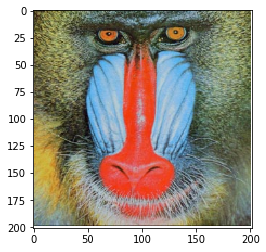

saving
grayscaleglouton


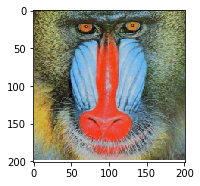

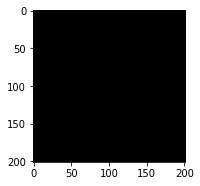

Inversion


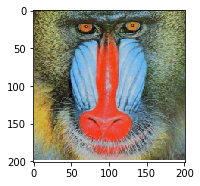

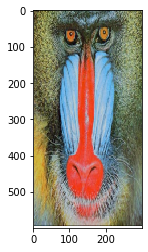

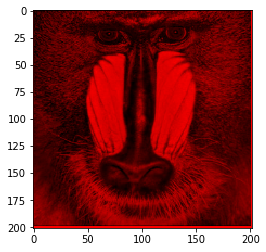

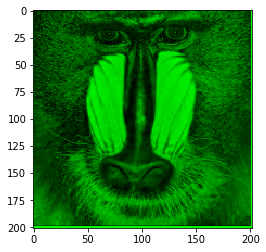

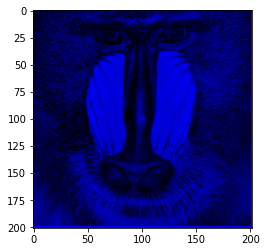

In [74]:
#Lecture de l'image avec matplotlib grace à la classe Picture
imge=Picture("laye.png",100,100)

#getH()
print("retour de la hauteur H= ",imge.getH())

 
# getW()
print("retour de la largeur L= ",imge.getW())

#retour du tableau numpy
print('le tableau numpy constituant limage',imge.getImg())

#getcouleur()
imge.getCouleur(10,20)

#setCouleur()


#Affichage()
print('affichage')
imge.affiche()

# save(self, nomFichier)
print('saving')
imge.save("saved.png")

#ImageProcessing
laye1 = ImageProcessing(Picture('laye.png',None,None))
print('grayscaleglouton')
laye1.transformGrayscaleGlouton()
#transformscale
print('Inversion')
laye1.transformScale(600,300)

#separe_couleur(nomFichier)
laye1.separerCouleur()

#filtreGlass()
laye1.filtreGlass()

